# Getting Started

We start by defining a `SystemDescriptor` object. The simplest way to create it is by means of the `build_system` function. By default, it creates a spin $1/2$ chain with four sites:



In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display_latex
from alpsqutip import build_system, list_operators_in_alps_xml, list_graph_in_alps_xml, graph_from_alps_xml, model_from_alps_xml

system=build_system()


loading model spin  over graph chain lattice


This creates a `SystemDescriptor` object, containing several properties. One of the is the `spec` property, storing information about the objects that defines it: 
* A model specification (`system.spec["model"]`)
* A geometry specification (`system.spec["graph"]`)
* A dictionary of parameters (`system.spec["parms"]`)

We can draw the lattice by accessing the `graph` element:


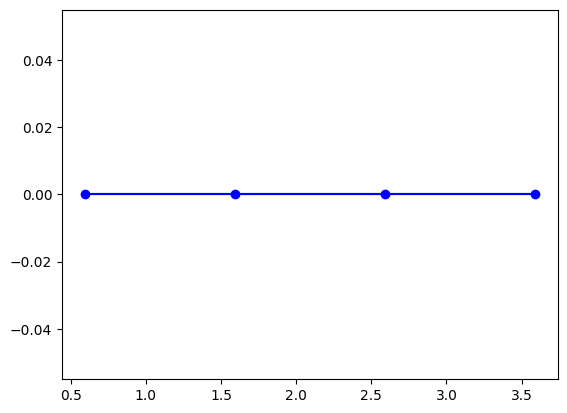

In [2]:
system.spec["graph"].draw(plt)

We can also access the name of each site through the attribute `sites`. `system.sites` is a dictionary which associates to the name of each site its specification:


In [3]:
print(system.sites.keys())

dict_keys(['1[0]', '1[1]', '1[2]', '1[3]'])


The site specification contains information like the dimension of the Hilbert space, the specification of the quantum numbera and the basic local operators defining the local algebra of observables:

In [4]:
print("the dimension of the first site is ", system.sites['1[0]']["dimension"])
print("Quantum numbers:" ,system.sites['1[0]']["qn"])
print(tuple(system.sites['1[0]']["operators"]))

the dimension of the first site is  2
Quantum numbers: {'S': {'min': 0.5, 'max': 0.5, 'fermionic': False, 'operator': 's'}, 'Sz': {'min': '-S', 'max': 'S', 'fermionic': False, 'operator': 'Sz'}}
('identity', 'Splus', 'Sminus', 'Sz', 's', 'Sx', 'Sy')


We can also access to operators defined over the whole system. Maybe the most important is the Hamiltonian:

In [5]:
system.global_operator("Hamiltonian")

(
qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
)

or the magnetization

In [6]:
system.global_operator("Sz")

  (Local Operator on site 1[0]:
 array([[-0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j]]))
  +(Local Operator on site 1[1]:
 array([[-0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j]]))
  +(Local Operator on site 1[2]:
 array([[-0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j]]))
  +(Local Operator on site 1[3]:
 array([[-0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0.5+0.j]]))

The list of predefined global operators can be accessed through 


In [7]:
tuple(system.operators["global_operators"])

('Sz', 'spin_exchange_energy', 'Hamiltonian')

It is also possible to access to operators associated to a site:

In [8]:
system.site_operator("Sx@1[0]")

Local Operator on site 1[0]:
 array([[0. +0.j, 0.5+0.j],
       [0.5+0.j, 0. +0.j]])

Operators can be combined algebraically to build expressions. For example:

In [9]:
H=system.global_operator("Hamiltonian")
sx1= system.site_operator("Sx@1[0]")
Hzeeman = -2 * system.global_operator("Sz") 
Htotal=(Hzeeman+H).simplify()
Htotal

(
qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +  (Local Operator on site 1[0]

Given an operator, it is straightforward to get its spectrum:

In [10]:
Htotal.eigenenergies()

array([-3.00000000e+00, -3.00000000e+00, -2.00000000e+00, -2.00000000e+00,
       -2.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.22220204e-16,
        5.77179330e-18,  5.66309413e-16,  1.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  3.00000000e+00,  5.00000000e+00])

exponentiate it:

In [11]:
Htotal.expm()

qutip interface operator for
Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.33062647e-02 2.92549111e-02 0.00000000e+00
  1.35191963e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.92549111e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.92549111e-02 6.33062647e-02 0.00000000e+00
  2.92549111e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.35191963e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.18205689e-03
  0.00000000e+00 2.90062615e-03 1.44410990e-0

or get a trace:

In [12]:
print("The partition function is ", (-Htotal).expm().tr(),"~", sum([np.exp(-en) for en in Htotal.eigenenergies()]))

The partition function is  71.83776026426847 ~ 71.83776026426845


# Qutip integration


It is also straightforward to convert operators into qutip objects, and use them with the solvers:

In [13]:
H

(
qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]
)

Text(0, 0.5, '$\\langle sx_1+sx_2\\rangle$')

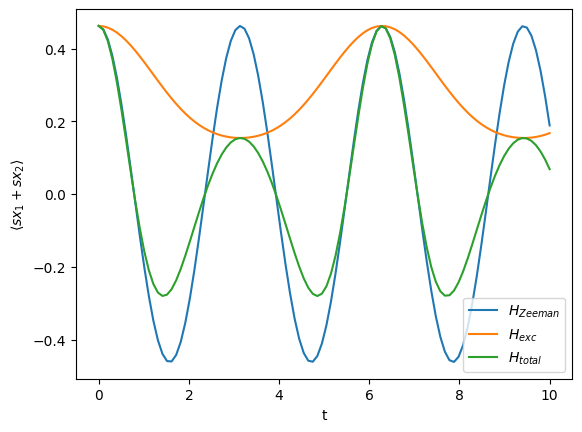

In [14]:
import qutip


sx01=system.site_operator("Sx@1[0]")+system.site_operator("Sx@1[1]")
rho0 = (sx01).expm()
rho0 = rho0/rho0.tr()
ts=np.linspace(0,10,100)
result = qutip.mesolve(tlist=ts, H=Hzeeman.to_qutip(), rho0=rho0.to_qutip(), e_ops=(sx01.to_qutip(),))
plt.plot(ts, result.e_data[0],label="$H_{Zeeman}$")
result = qutip.mesolve(tlist=ts, H=H.to_qutip(), rho0=rho0.to_qutip(), e_ops=(sx01.to_qutip(),))
plt.plot(ts, result.e_data[0],label="$H_{exc}$")
result = qutip.mesolve(tlist=ts, H=Htotal.to_qutip(), rho0=rho0.to_qutip(), e_ops=(sx01.to_qutip(),))
plt.plot(ts, result.e_data[0],label="$H_{total}$")
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$\langle sx_1+sx_2\rangle$")


# Larger systems

As far as explicit computations requiring diagonalizations are not required, it is possible to define larger systems:

In [15]:
system_large = build_system(a=1,L=100)
H=system_large.global_operator("Hamiltonian")
sz=system_large.global_operator("Sz")
sx0_loc=system_large.site_operator("Sx@1[0]")

(H*sx0_loc-sx0_loc*H).simplify()

loading model spin  over graph chain lattice


(
qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.   -0.25  0.25  0.  ]
 [ 0.25  0.    0.   -0.25]
 [-0.25  0.    0.    0.25]
 [ 0.    0.25 -0.25  0.  ]]
  +qutip interface operator for
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.   -0.25  0.25  0.  ]
 [ 0.25  0.    0.   -0.25]
 [-0.25  0.    0.    0.25]
 [ 0.    0.25 -0.25  0.  ]]
)

In [16]:
(H*sz-sz*H).simplify()

0 * Identity 

# Systems in other geometries

Other geometries models are allowed

loading model spin  over graph open square lattice


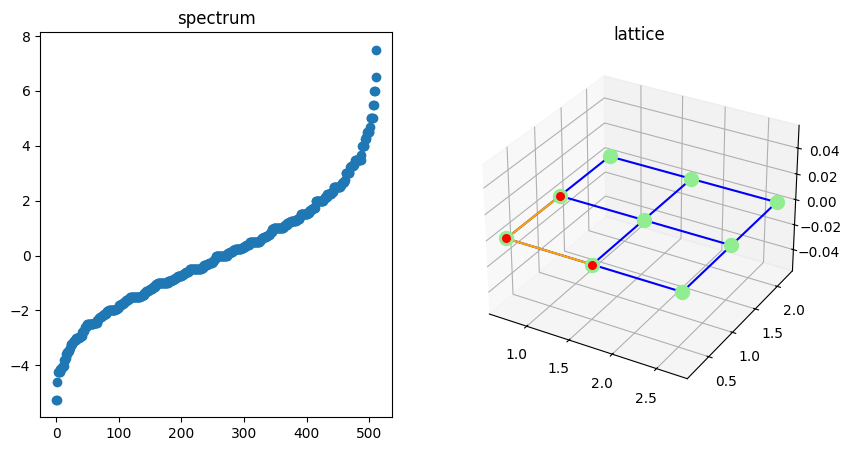

In [17]:
    
from alpsqutip.utils import eval_expr
from alpsqutip.model import SystemDescriptor

# Load a system
system = build_system(geometry_name= "open square lattice",model_name="spin",  L=3, a=1, h=1,J=1) 


# enumerate the name of each subsystem
sites = [s for s in system.sites]

# Build some specific site and bond operators
exchange01=system.bond_operator("exchange_xy", sites[0], sites[1])
exchange10 =system.bond_operator("exchange_xy", sites[1], sites[0])
sz0 = system.site_operator("Sz",sites[0])
sz1 = system.site_operator("Sz",sites[1])
# Get the Hamiltonian 
H = system.global_operator("Hamiltonian")

# Plot the lattice and the spectrum
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)

# Convert to qutip and get the spectrum
spectrum = H.to_qutip().eigenenergies()
ax.scatter(range(len(spectrum)),sorted(spectrum))
ax.set_title("spectrum")
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title("lattice")
system.spec["graph"].draw(ax, node_spec={"0":{"c":"lightgreen","s":100}})
system.spec["graph"].subgraph(frozenset({sites[0],sites[1],sites[3],})).draw(ax, node_spec={"0":{"c":"red","s":30}},
                                               edge_spec={"0":{"c":"orange"}})

In [18]:
# Models and local basis

from alpsqutip.settings import MODEL_LIB_FILE

models = list_operators_in_alps_xml(MODEL_LIB_FILE)

for name in models:
    print(name)
    try:
        model = model_from_alps_xml(MODEL_LIB_FILE, name, parms={"L":3, "W":3, "a":1,"b":1, "c":1, "Nmax":5})
        print("site types:", {name: lb["name"]  for name, lb in  model.site_basis.items()})
    except Exception as e:
        print("   load failed")
    print(40*"-")

boson
site types: {'0': 'boson'}
----------------------------------------
alternative fermion Hubbard
site types: {'0': 'alternative fermion'}
----------------------------------------
alternative fermion
site types: {'0': 'alternative fermion'}
----------------------------------------
boson Hubbard
site types: {'0': 'boson'}
----------------------------------------
Ian's fermion Hubbard
site types: {'0': 'fermion'}
----------------------------------------
alternative t-J
site types: {'0': 'alternative t-J'}
----------------------------------------
fermion Hubbard
site types: {'0': 'fermion'}
----------------------------------------
spinless fermions
site types: {'0': 'spinless fermion'}
----------------------------------------
spinless fermion
site types: {'0': 'spinless fermion'}
----------------------------------------
hardcore boson
site types: {'0': 'hardcore boson'}
----------------------------------------
Kondo lattice
site types: {'0': 'fermion', '1': 'spin'}
-------------------

# Lattices in the library

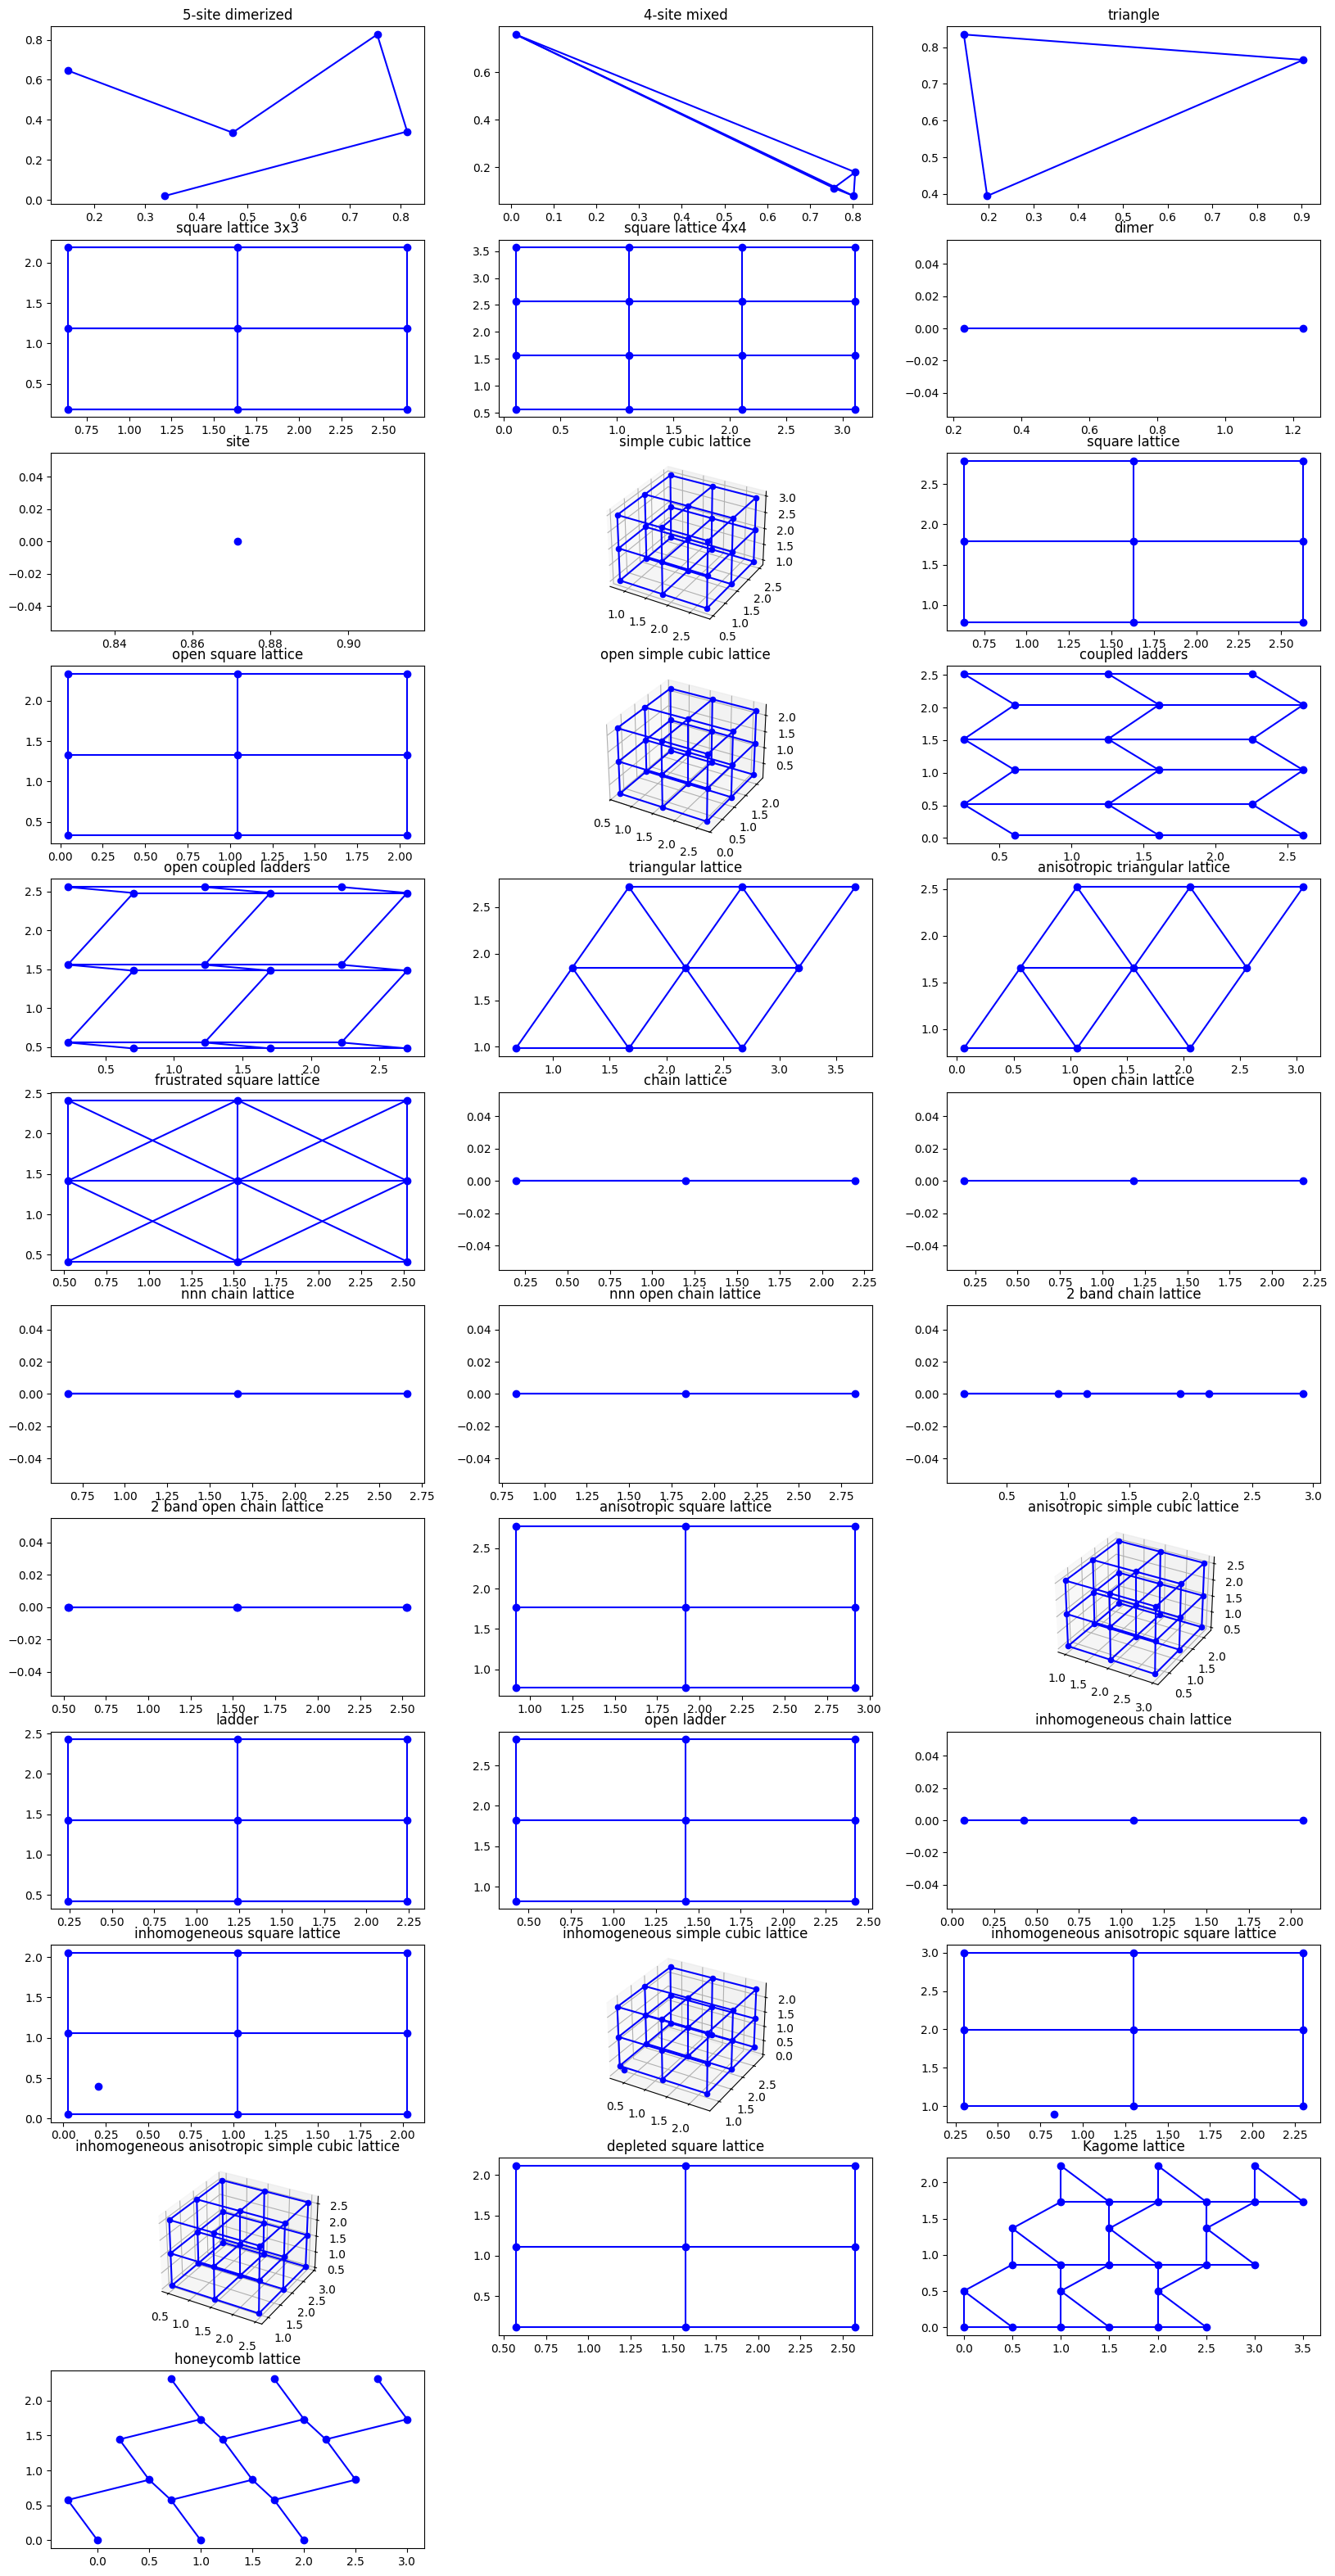

In [19]:
from alpsqutip.settings import LATTICE_LIB_FILE
graphs = list_graph_in_alps_xml(LATTICE_LIB_FILE)


fig = plt.figure(figsize=(20,40))
pos = 0
rows = (len(graphs)+2) //3
for name in graphs:
    pos += 1
    g = graph_from_alps_xml(LATTICE_LIB_FILE, name, parms={"L":3, "W":3, "a":1,"b":1, "c":1})
    
    if g.lattice and g.lattice["dimension"] > 2:
        ax = fig.add_subplot(rows, 3, pos, projection='3d')
        ax.set_proj_type("persp")
    else:
        ax = fig.add_subplot(rows, 3, pos)
    ax.set_title(name)
    g.draw(ax)
plt.show()

In [22]:
# Systems
from alpsqutip.model import SystemDescriptor


models = list_operators_in_alps_xml(MODEL_LIB_FILE)
graphs = list_graph_in_alps_xml(LATTICE_LIB_FILE)

for model_name in models:
    print(model_name, "\n", 10*"*")
    for graph_name in graphs:
        g = graph_from_alps_xml(LATTICE_LIB_FILE, graph_name, parms={"L":3, "W":3, "a":1,"b":1, "c":1})
        model = model_from_alps_xml(MODEL_LIB_FILE, model_name, parms={"L":3, "W":3, "a":1,"b":1, "c":1, "Nmax":5})
        try:
            system = SystemDescriptor(g, model, {})
        except Exception as e:
            print("   ", graph_name, "  [Failed]", type(e), e)
            continue
        print("   ", graph_name, "  [OK]")
    print("-------------")

boson 
 **********
    5-site dimerized   [OK]
    4-site mixed   [Failed] <class 'KeyError'> '1'
    triangle   [OK]
    square lattice 3x3   [OK]
    square lattice 4x4   [OK]
    dimer   [OK]
    site   [OK]
    simple cubic lattice   [OK]
    square lattice   [OK]
    open square lattice   [OK]
    open simple cubic lattice   [OK]
    coupled ladders   [OK]
    open coupled ladders   [OK]
    triangular lattice   [OK]
    anisotropic triangular lattice   [OK]
    frustrated square lattice   [OK]
    chain lattice   [OK]
    open chain lattice   [OK]
    nnn chain lattice   [OK]
    nnn open chain lattice   [OK]
    2 band chain lattice   [Failed] <class 'KeyError'> '1'
    2 band open chain lattice   [Failed] <class 'KeyError'> '1'
    anisotropic square lattice   [OK]
    anisotropic simple cubic lattice   [OK]
    ladder   [OK]
    open ladder   [OK]
    inhomogeneous chain lattice   [OK]
    inhomogeneous square lattice   [OK]
    inhomogeneous simple cubic lattice   [OK]
    in